In [2]:
from IPython.html import widgets
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
import numpy as np
from base import plotting
from base.classifiers import OnevsallContinuous
import base.classifiers.onevsall as oa
import glob
import pandas as pd
from base import tools
from scipy import stats
import itertools
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab

In [4]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")

In [5]:
mpld3.enable_notebook()

In [6]:
%%R 
library(ggplot2);library(dplyr);library(MASS);library(reshape2)

Use suppressPackageStartupMessages to eliminate package startup messages.

Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



# Classification results

In [7]:
GNB_clf_cog = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/coact_kmeans*GNB*cog*")]
GNB_scores_cog = []
for clfs in [GNB_clf_cog]:
    for clf in clfs:
        for n, score in enumerate(clf.class_score):
            GNB_scores_cog.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])

GNB_scores_cog = pd.DataFrame(GNB_scores_cog, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
GNB_scores_cog['n_regions'] = GNB_scores_cog['n_regions'].apply(str)
GNB_scores_cog['features'] = 'Cognitive'
GNB_scores_cog['classifier'] = 'Naive Bayes'


In [14]:
clf1 = GNB_clf_cog[0]

In [17]:
clf1.fit_clfs

[]

In [8]:
GNB_clf_junk = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/coact_kmeans*GNB*junk*")]
GNB_scores_junk = []
for clfs in [GNB_clf_junk]:
    for clf in clfs:
        for n, score in enumerate(clf.class_score):
            GNB_scores_junk.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])

GNB_scores_junk = pd.DataFrame(GNB_scores_junk, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
GNB_scores_junk['n_regions'] = GNB_scores_junk['n_regions'].apply(str)
GNB_scores_junk['features'] = 'Junk'
GNB_scores_junk['classifier'] = 'Naive Bayes'
del GNB_clf_junk

In [9]:
GNB_clf_all = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/*coact_kmeans*GNB_*all*")]
GNB_scores_all = []
for clfs in [GNB_clf_all]:
    for clf in clfs:
        for n, score in enumerate(clf.class_score):
            GNB_scores_all.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])
    

GNB_scores_all = pd.DataFrame(GNB_scores_all, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
GNB_scores_all['n_regions'] = GNB_scores_all['n_regions'].apply(str)
GNB_scores_all['features'] = 'All'
GNB_scores_all['classifier'] = 'Naive Bayes'
del GNB_clf_all

In [10]:
ridge_clf_all = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/*coact_kmeans*RidgeClassifer_*all*")]
ridge_scores_all = []
for clf in ridge_clf_all:
    for n, score in enumerate(clf.class_score):
        ridge_scores_all.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])
    

ridge_scores_all = pd.DataFrame(ridge_scores_all, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
ridge_scores_all['n_regions'] = ridge_scores_all['n_regions'].apply(str)
ridge_scores_all['features'] = 'All'
ridge_scores_all['classifier'] = 'Ridge'
del ridge_clf_all

KeyboardInterrupt: 

In [ ]:
ridge_clf_junk = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/*coact_kmeans*RidgeClassifier_*junk*")]
ridge_scores_junk = []
for clf in ridge_clf_junk:
    for n, score in enumerate(clf.class_score):
        ridge_scores_junk.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])
    

ridge_scores_junk = pd.DataFrame(ridge_scores_junk, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
ridge_scores_junk['n_regions'] = ridge_scores_junk['n_regions'].apply(str)
ridge_scores_junk['features'] = 'Junk'
ridge_scores_junk['classifier'] = 'Ridge'
del ridge_clf_junk

In [12]:
ridge_clf_cog = [OnevsallContinuous.load(clf + "/classifier.pkl") for clf in glob.glob("../results/*coact_kmeans*RidgeClassifer_*cog*")]
ridge_scores_cog = []
for clf in ridge_clf_cog:
    for n, score in enumerate(clf.class_score):
        ridge_scores_cog.append([clf.mask_num, n, clf.n_features_orig, 'clf' , score])
    

ridge_scores_cog = pd.DataFrame(ridge_scores_cog, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])
ridge_scores_cog['n_regions'] = ridge_scores_cog['n_regions'].apply(str)
ridge_scores_cog['features'] = 'Cognitive'
ridge_scores_cog['classifier'] = 'Ridge'
# del ridge_clf_cog

In [13]:
all_scores = pd.concat([GNB_scores_cog, GNB_scores_all, ridge_scores_cog, ridge_scores_all,ridge_scores_junk,  GNB_scores_junk])


In [14]:
# from base.tools import region_n_vox
# n_vox = []
# for regions in clfs:
#     n_vox = n_vox + list(itertools.izip(itertools.repeat(regions.mask_num), range(0, regions.mask_num), 
#                                      list(region_n_vox(dataset, regions.mask_img))))
# n_vox = pd.DataFrame(n_vox, columns=['n_regions', 'region', 'voxels'])
# n_vox['n_regions'] = n_vox['n_regions'].apply(str)
# all_scores = pd.merge(all_scores, n_vox)


In [15]:
%Rpush all_scores

In [16]:
%%R
str(all_scores)

'data.frame':	3600 obs. of  7 variables:
 $ n_regions : Factor w/ 7 levels "100","150","20",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ region    : int [1:3600(1d)] 0 1 2 3 4 5 6 7 8 9 ...
 $ n_topics  : int [1:3600(1d)] 60 60 60 60 60 60 60 60 60 60 ...
 $ clf       : Factor w/ 1 level "clf": 1 1 1 1 1 1 1 1 1 1 ...
 $ score     : num [1:3600(1d)] 0.599 0.588 0.613 0.578 0.603 ...
 $ features  : Factor w/ 3 levels "All","Cognitive",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ classifier: Factor w/ 2 levels "Naive Bayes",..: 1 1 1 1 1 1 1 1 1 1 ...


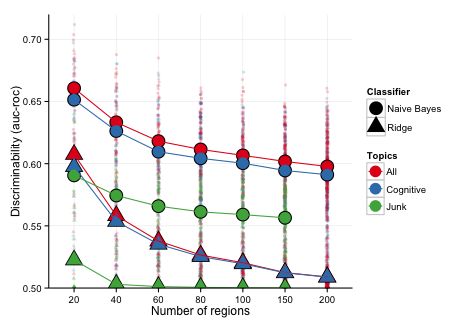

In [17]:
%%R -w 470 -h 325
all_scores$n_regions <- factor(all_scores$n_regions,levels = c("20", "40", "60", "80", "100", "150", "200"))

ggplot(all_scores, aes(n_regions, score, color=features, shape=classifier, group=interaction(classifier, features))) + 
geom_point(position=position_jitter(width=0.02), alpha=0.2, size=1.5) +
stat_summary(fun.y=mean, geom='point', size=6.5, color="black") +
stat_summary(fun.y=mean, geom='point', size=5.5)  +
stat_summary(fun.y='mean', geom='line') +
theme_bw() + ylab("Discriminability (auc-roc)") + xlab("Number of regions") +
scale_color_brewer(type="qual", name = "Topics", palette="Set1") +
scale_shape(name="Classifier") +
theme(panel.border = element_blank(), 
     panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
coord_cartesian(ylim = c(0.5, 0.72))
# ggsave("../reports/ns_classify_paper/figures/reg_variance_classifier_interaction.png")


In [18]:
%%R
summary(lm(score~classifier, data=all_scores))


Call:
lm(formula = score ~ classifier, data = all_scores)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099201 -0.016684 -0.008033  0.015570  0.174278 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.5938984  0.0007108  835.49   <2e-16 ***
classifierRidge -0.0772148  0.0010138  -76.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03041 on 3598 degrees of freedom
Multiple R-squared:  0.6172,	Adjusted R-squared:  0.6171 
F-statistic:  5801 on 1 and 3598 DF,  p-value: < 2.2e-16



In [19]:
(all_scores.groupby('features').mean().score['All'] - all_scores.groupby('features').mean().score['Cognitive'])

0.0016031964714647851

In [20]:
all_scores.score.mean()

0.55593446653378342

In [21]:
# %%R -w 600 -h 480 -u px
# ggplot(all_scores, aes(voxels, score, color=factor(n_regions))) + geom_point(size = 2) + theme_bw() + stat_smooth(method=rlm, se=F)

In [22]:
num_regions = 80
num_topics = 60

In [23]:
o_clf = [clf for clf in GNB_clf_cog if (clf.mask_num == num_regions) & (clf.n_features_orig == num_topics)][0]


In [24]:
o_clf.mask_img

'../masks/new_neurosynth/whole_brain_k_means/whole_brain_kmeans_k80/cluster_labels.nii.gz'

In [25]:
o_clf.class_score.mean()

0.6042816042826058

In [26]:
# tools.make_mask_map(o_clf.class_score, o_clf.mask_img, '../results/wardmin75_' + str(num_regions) + '_Ridge_abs_topics_filt/class_scores')

In [27]:
all_scores.region = all_scores.region+1

### Discriminability by base rate

In [28]:
# Set region and classifier for following analyses
# base_rates = tools.region_vox_baserates(dataset, o_clf.mask_img)

In [29]:
acc = all_scores[(all_scores['n_topics'] == num_topics) & (all_scores['n_regions'] == str(num_regions)) & (all_scores['features'] == 'Cognitive') & (all_scores['classifier'] == 'Naive Bayes')].copy()

# acc = pd.merge(base_rates, acc)
mean_acc = acc.groupby(['region']).agg(np.mean).reset_index()

In [30]:
# mean_br_plot = mean_acc.rename(columns = {'base_rate':'Activation base rate (% studies active)', 'score': "score"})
# br_auc_oplot = sns.lmplot('Activation base rate (% studies active)', 'score', mean_br_plot, ci=None)
# tooltip = mpld3.plugins.PointLabelTooltip(br_auc_oplot.axes[0][0].collections[0], labels=list(mean_acc.region))
# fig = plt.gcf()
# mpld3.plugins.connect(fig, tooltip)

## Feature importance analysis

In [31]:
word_keys = pd.read_csv("../data/unprocessed/abstract_topics_filtered/topic_sets/top_words_" + str(num_topics) + ".csv")
word_keys['top_2'] = word_keys.top_words.apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])

In [32]:
# The mean of the feature importances predicts the classification score
stats.pearsonr(o_clf.feature_importances.mean(axis=1), o_clf.class_score)

(0.31339115929575145, 0.0046457832729727101)

In [33]:
# The absolute mean of the feature importances doesn't predict the classification score
stats.pearsonr(np.abs(o_clf.feature_importances.mean(axis=1)), o_clf.class_score)

(0.38444981874585238, 0.00043017099810542086)

In [34]:
# The variance of the feature importances predicts the classification score
stats.pearsonr(o_clf.feature_importances.var(axis=1), o_clf.class_score)

(0.76236320202527874, 2.1225816288725481e-16)

In [35]:
o_fi = pd.DataFrame(o_clf.feature_importances)

# Melt feature importances, and add top_words for each feeature
o_fi['region'] = range(1, o_fi.shape[0] + 1)
o_fis_melt = pd.melt(o_fi, var_name='topic_order', value_name='importance', id_vars=['region'])

word_keys = pd.merge(pd.DataFrame(np.array([range(0, o_clf.feature_importances.shape[1]), o_clf.feature_names]).T, columns=['topic_order', 'topic_name']), word_keys)
word_keys.topic_order = word_keys.topic_order.astype('int')

o_fis_melt= pd.merge(o_fis_melt, word_keys)
o_fis_melt['abs_imp'] = np.abs(o_fis_melt['importance'])

o_fis_melt = pd.merge(o_fis_melt, mean_acc)
%Rpush o_fis_melt

In [36]:
o_clf.feature_importances

masked_array(data =
 [[-0.07241353476511837 0.21508483872149223 0.06830286123981841 ...,
  0.18011629730344914 0.06939769100412327 0.12267989226774564]
 [0.0068982241751563145 -0.10010979376331833 0.07301264901374088 ...,
  -0.10173895065985691 -0.03334608767634445 -0.0419922102440724]
 [0.014234219017038835 0.10867290779118483 0.04697952213728529 ...,
  0.01508910220477877 0.04497598738439024 -0.014933798693156142]
 ..., 
 [-0.042741130490375645 0.2266219172534717 -0.007972724947208687 ...,
  0.26433878721081777 0.1658948047949161 0.11650640870742685]
 [0.06567682686749388 -0.13592165146955512 -0.009395896195281805 ...,
  -0.1404364286923409 -0.07944112126984548 -0.053521235944210155]
 [-0.08016873316025999 0.070178748826142 -0.02761344472015323 ...,
  0.24217819018352638 -0.04955161169412864 0.0772377761602483]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False

In [37]:
# categories = np.unique(o_fis_melt['topic_name'])
# colors = np.linspace(0, 1, len(categories))
# colordict = dict(zip(categories, colors))
# o_fis_melt["Color"] = o_fis_melt['topic_name'].apply(lambda x: colordict[x])

# pylab.rcParams['figure.figsize'] = 10, 5  # that's default image size for this interactive session
# sns.set_style("white")
# scatter = plt.scatter(o_fis_melt.score, o_fis_melt.importance, c=o_fis_melt.Color, cmap=cm.Set1, s=50, alpha=0.8)
# fig = plt.gcf()
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=list(zip(o_fis_melt.region.values, o_fis_melt.top_words.values)))
# mpld3.plugins.connect(fig, tooltip)


In [38]:
mpld3.disable_notebook()

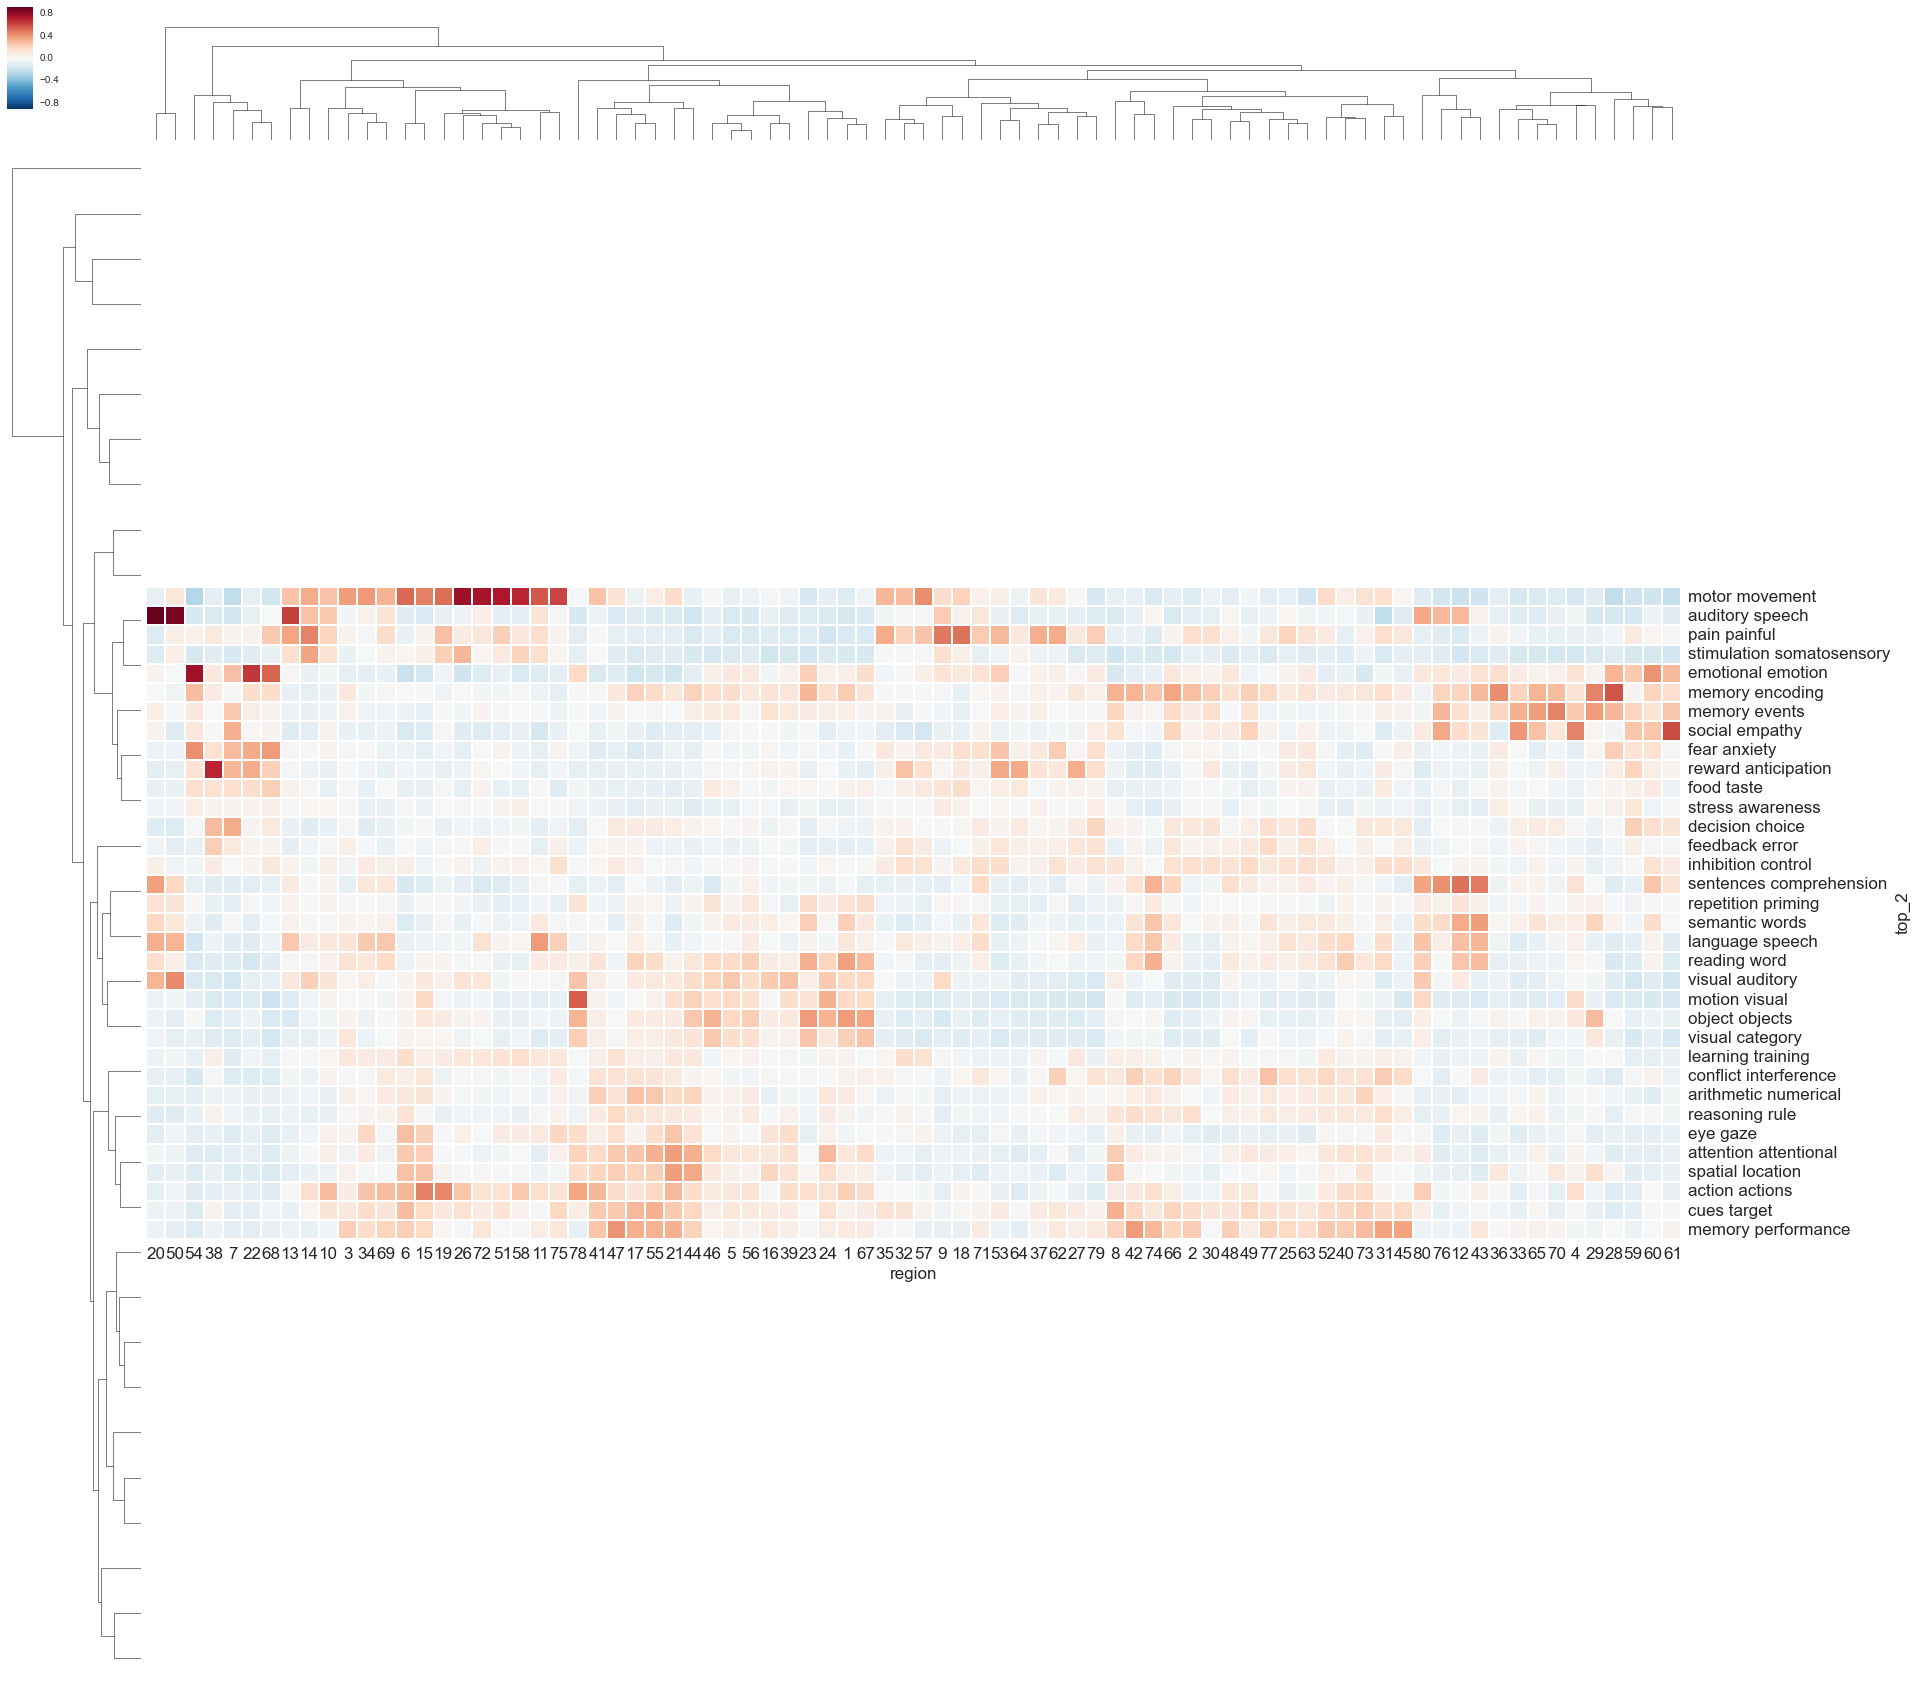

In [39]:
plot = sns.clustermap(pd.pivot_table(o_fis_melt, values='importance', index=['top_2'], columns=['region']), square=True, figsize = (30, 30))
ax = plot.fig.get_axes()[2]
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(17)
    
# plt.savefig('../reports/ns_classify_paper/figures/cluster_fi_map.png', bbox_inches='tight')


In [40]:
o_fis_melt.importance.min()

-0.26157924766813323

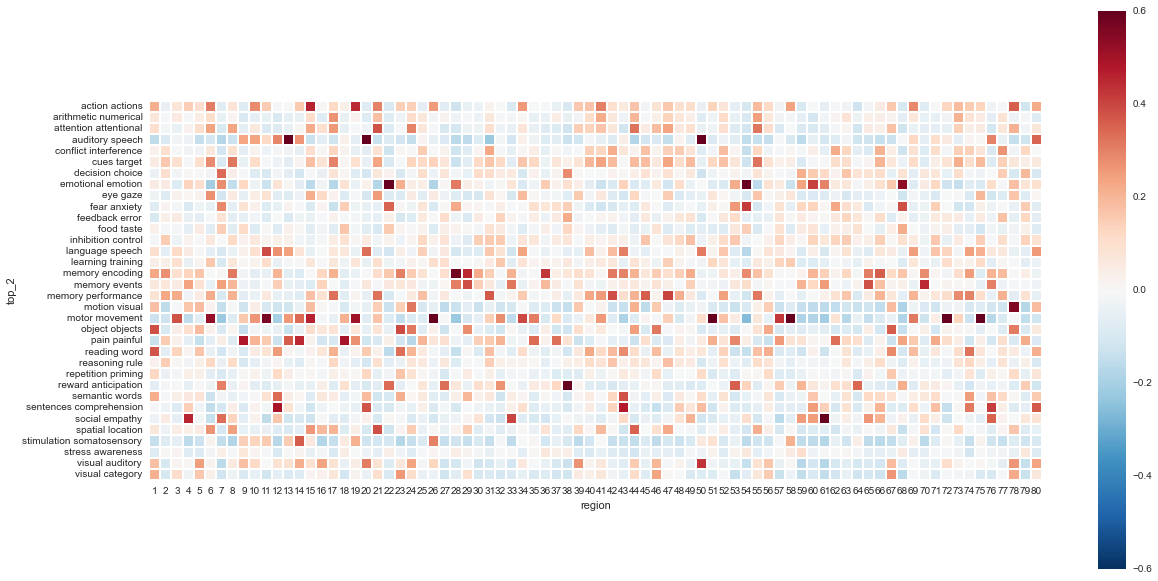

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.pivot_table(o_fis_melt, values='importance', index=['top_2'], columns=['region']), vmax=0.6, vmin=-0.3, square=True)
ax = plot.fig.get_axes()
a = ax[3]
a.tick_params(left='off')
# plt.savefig('../reports/ns_classify_paper/figures/fi_map_GNB.png', bbox_inches='tight')


## Feature importance bar plots

In [42]:
zscore = lambda x: (x - x.mean()) / x.std()
o_fis_melt['importance_z'] = o_fis_melt.groupby('region')['importance'].apply(zscore)

In [43]:
## Using 40
# labels = ['vmPFC', 'dlPFC','Amyg', 'aInsula', 'NAcc', 'Motor', 'vlPFC (L)', 'TPJ', 'Hipp']
# regions = np.array([25, 8, 23, 29, 10, 38, 21, 13, 31])
# labels = zip(list(regions), labels)
# # 10 = dlpfc cluster
# selected_regions = o_fis_melt[np.in1d(o_fis_melt.region,regions) ]


In [44]:
## Using 80 regions
labels = ['vmPFC', 'dlPFC','Amyg', 'VS', 'TPJ', 'Hipp', 'SMA', 'aInsula', 'Precun', 'v1']
regions = np.array([7, 45, 54,38, 80, 28, 51, 63, 16, 39])
labels = zip(list(regions), labels)
selected_regions = o_fis_melt[np.in1d(o_fis_melt.region,regions) ]


In [45]:
from base import img_tools

In [46]:
# Top_3
sel_topics = selected_regions[selected_regions.groupby('region').rank(ascending=False).abs_imp < 3]
top_n = selected_regions[np.in1d(selected_regions.topic_name, sel_topics.topic_name) ]

top_n['region_names'] = top_n['region'].map(dict(labels))


%Rpush top_n
%Rpush regions

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


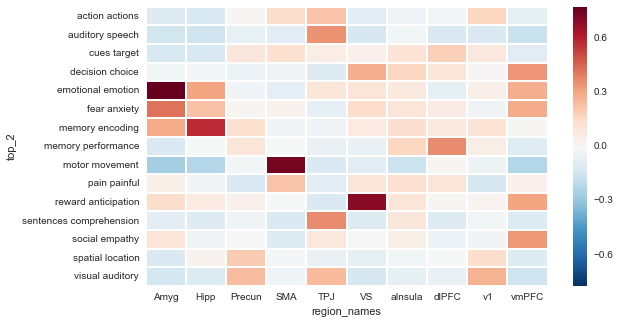

In [47]:
mpld3.disable_notebook()
plt.figure(figsize=(9, 5))
sns.heatmap(pd.pivot_table(top_n, values='importance', index=['top_2'], columns=['region_names']))

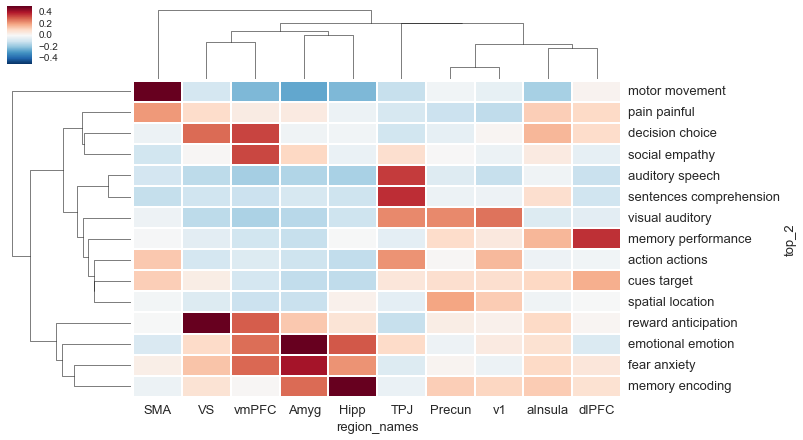

In [48]:
mpld3.disable_notebook()
plot = sns.clustermap(pd.pivot_table(top_n, values='importance', index=['top_2'],  columns=['region_names']), method='centroid', vmax=0.5, vmin=-0.27, robust=True, figsize=(11, 7))
ax = plot.fig.get_axes()[2]
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
    
plt.savefig('../reports/ns_classify_paper/figures/selected_fi_map_GNB_less.png', bbox_inches='tight')

In [49]:
top_n.importance.min()

-0.26157924766813323

In [50]:
?sns.heatmap

In [51]:
# tools.make_mask_map(selected_regions.groupby('region').mean().r2, o_clf.mask_img, '../results/wardmin75_30_Ridge_abs_topics_filt/class_score.nii.gz', index=regions -1)

## Shannon's Diversity

In [52]:
import base.statistics as my_stats

In [53]:
o_fis_melt['imp_min'] = o_fis_melt.importance + o_fis_melt.importance.min()*-1 

In [54]:
sdi = pd.DataFrame(o_fis_melt.groupby('region').apply(lambda x: my_stats.shannons(x['imp_min'])), columns=['sdi']).reset_index()

In [55]:
sdi['n'] = [np.bincount(reg[1])[1] for reg in o_clf.data]

In [56]:
sdi['Hcorr'] = sdi.apply(lambda x: x['sdi'] + ((x['sdi'] - 1)/(2*x['n'])), axis=1)

In [57]:
tools.make_mask_map(sdi['sdi'], o_clf.mask_img, '../results/coact_kmeans_80_GNB_t0.05_cog_topics_60/sdi')

In [58]:
tools.make_mask_map(sdi['Hcorr'], o_clf.mask_img, '../results/coact_kmeans_80_GNB_t0.05_cog_topics_60/sdi_corr')

#Multivarate plots

In [59]:
# alpha_mses = []
# for n, model in enumerate(o_clf.fit_clfs):
#     alpha_mse = pd.DataFrame(np.vstack([model.cv_alphas_, model.cv_mse_path_.mean(axis=1)]).T, columns=['alpha', 'MSE'])
#     alpha_mse['region'] = n
#     alpha_mses.append(alpha_mse)
# alpha_mses = pd.concat(alpha_mses)
# %Rpush alpha_mses

In [60]:
%%R -w 1000 -h 600
ggplot(alpha_mses, aes(alpha, MSE, color=factor(region))) + theme_bw() + ylab("MSE" ) + xlab("alpha") + 
theme(axis.title.y = element_text(size = 13, vjust = 0.2))  + geom_line(size = 1) + geom_point()  +
coord_cartesian(xlim = c(0, 0.0001))

Error in ggplot(alpha_mses, aes(alpha, MSE, color = factor(region))) : 
  object 'alpha_mses' not found
In addition: Warning message:
package ‘dplyr’ was built under R version 3.1.2
Error in ggplot(alpha_mses, aes(alpha, MSE, color = factor(region))) : 
  object 'alpha_mses' not found


In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import explained_variance_score

from sklearn.metrics import make_scorer
import base.mv as mv
from sklearn.metrics import auc
regions.sort()
from base import mv

In [62]:
mv_results = mv.calc_mv_classifier(o_clf, roc_auc_score, regions=regions-1, processes=8, method='combinatorial')

[##########] 100%


In [63]:
mv_results = pd.merge(mv_results, word_keys, left_on='feature', right_on='topic_name').sort(['region', 'num_features'])

In [64]:
mv_results['region_names'] = mv_results['region'].map(dict(labels))

In [65]:
unit_norm = lambda x: (x / x.max())
mv_results['score_unit'] = mv_results.groupby('region')['score'].apply(unit_norm)

%Rpush mv_results

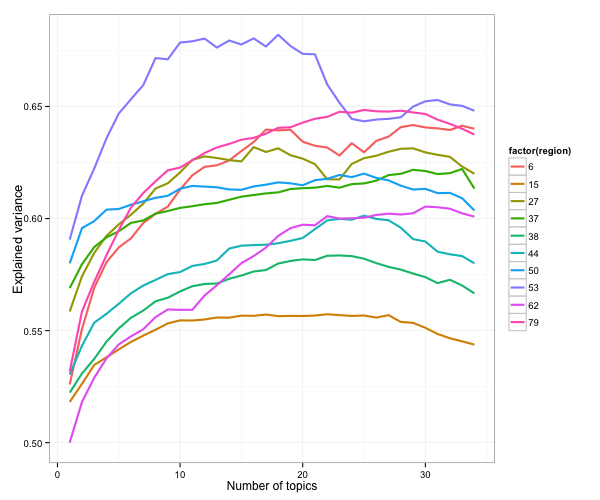

In [66]:
%%R -w 600 -h 500
library(ggplot2)
ggplot(mv_results, aes(num_features, score, color=factor(region))) + theme_bw() + ylab("Explained variance" ) + xlab("Number of topics") + 
theme(axis.title.y = element_text(size = 13, vjust = 0.2))  + stat_summary(fun.y=mean, geom="line", size=1)
# ggsave("../reports/vmpfc_comps/mv_ev_abs_complete.pdf")

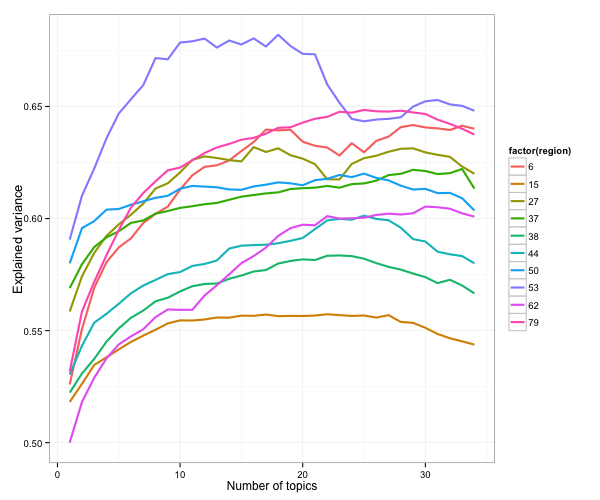

In [69]:
%%R -w 600 -h 500
library(ggplot2)
ggplot(mv_results, aes(num_features, score, color=factor(region))) + theme_bw() + ylab("Explained variance" ) + xlab("Number of topics") + 
theme(axis.title.y = element_text(size = 13, vjust = 0.2))  + stat_summary(fun.y=mean, geom="line", size=1)
# ggsave("../reports/vmpfc_comps/mv_ev_abs_complete.pdf")

In [70]:
mv_results.groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit']))

region
6         31.883443
15        32.619961
27        32.310032
37        32.281574
38        32.195389
44        31.960051
50        32.555771
53        31.838889
62        31.522167
79        31.954775
dtype: float64

In [71]:
# sns.regplot(selected_regions.groupby('region').mean().base_rate, mv_results.groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit'])))

In [72]:
mv_results.groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit']))

region
6         31.883443
15        32.619961
27        32.310032
37        32.281574
38        32.195389
44        31.960051
50        32.555771
53        31.838889
62        31.522167
79        31.954775
dtype: float64

In [73]:
mv_results.query('num_features <= 10').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit']))

region
6         8.186735
15        8.744413
27        8.507474
37        8.587456
38        8.485635
44        8.405714
50        8.761625
53        8.512241
62        8.048067
79        8.235811
dtype: float64

In [74]:
# tools.make_mask_map(mv_results.query('num_features <= 10').groupby('region').apply(
#     lambda x: auc(x['num_features'], x['score_unit'])).values, o_clf.mask_img, 
#         '../results/ward_f' + str(num_regions) + '_Ridge_abs_topics' + str(num_topics) + '_filt/mv_auc_10f_vmpfc', index=regions - 1)

In [75]:
mv_results.query('num_features <= 10').groupby('region').apply(
    lambda x: auc(x['num_features'], x['score_unit'])).values

array([ 8.18673542,  8.7444125 ,  8.50747448,  8.58745646,  8.48563513,
        8.40571379,  8.76162531,  8.51224061,  8.04806656,  8.23581067])

In [76]:
def cum_auc(df):
    results = []
    for i in range(3, df['num_features'].max() + 2):
        new_df = df.query('num_features < ' +str(i))
        results.append(auc(new_df['num_features'], new_df['score_unit']))
        
    results = pd.DataFrame(results).reset_index(level=0)   
    results.columns = ['num_features', 'cum_auc']
    results.num_features = results.num_features +2
    return results

In [77]:
test_df = mv_results[mv_results['region'] == 2]

In [78]:
o_clf

<base.classifiers.OnevsallClassifier instance at 0x1110d8050>

### All regions

In [79]:
mv_results_all = mv.calc_mv_classifier(o_clf, roc_auc_score, processes=8, method='combinatorial')
mv_results_all.region = mv_results_all.region +1


[##########] 100%


In [80]:
mv_results_all['region_names'] = mv_results_all['region'].map(dict(labels))


In [81]:
mv_results_all['region_names'] = mv_results_all['region_names'].fillna('Other')

In [82]:
mv_results_all['other_reg'] = mv_results_all['region_names'] == 'Other'

In [83]:
mv_results_all['alphas'] = mv_results_all['other_reg'].map(dict([(True, 0.8), (False, 1)]))

In [84]:
np.unique(mv_results_all.region_names)

array(['Amyg', 'Hipp', 'Other', 'Precun', 'SMA', 'TPJ', 'VS', 'aInsula',
       'dlPFC', 'v1', 'vmPFC'], dtype=object)

In [85]:
%Rpush mv_results_all

In [86]:
mv_results_all = mv_results_all.rename(columns={'feature':'topic_name'})

In [87]:
mv_results_all = pd.merge(mv_results_all,word_keys)

In [88]:
# mv_auc = mv_results_all.query('num_features < 20').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit'])).values

In [89]:
# tools.make_mask_map(1 / mv_auc, o_clf.mask_img, '../results/coact_kmeans_200_Ridge_cog_topics/mv_auc_20f')

In [90]:
# tools.make_mask_map( o_fis_melt.groupby('region').mean().base_rate, o_clf.mask_img, '../results/wardmin75_' + str(num_regions) + '_Ridge_abs_topics_filt/base_rate')

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


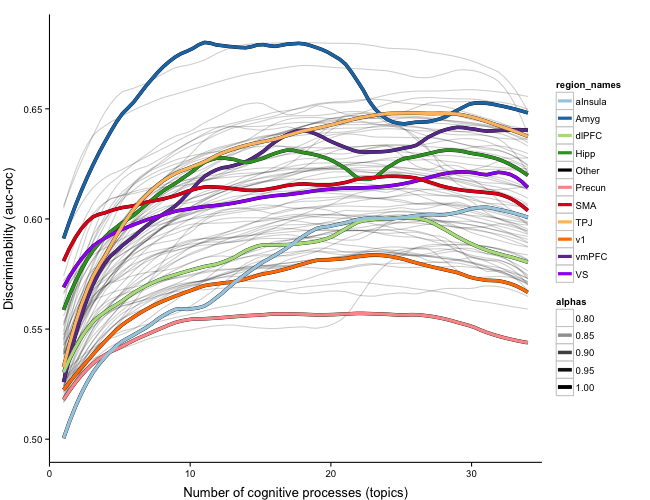

In [91]:
%%R -w 650 -h 500
ggplot(mv_results_all, aes(num_features, score, group=region, color=region_names, alpha=alphas)) + 
# stat_summary(fun.y=mean, geom="line", size=1, alpha=0.2) +
# stat_summary(fun.y=mean, geom="line", size=1.7, color='black') +
# stat_summary(fun.y=mean, geom="line", size=1.5) +
geom_line(stat='smooth', alpha=0.2, se=F, span=.2) +
geom_line(stat='smooth', size=1.7, color='black', span=.2) +
geom_line(stat='smooth', size=1.5, span=.2) +
theme_bw() + ylab("Discriminability (auc-roc)" ) + xlab("Number of cognitive processes (topics)") + 
theme(axis.title.y = element_text(size = 13, vjust = 1.5), axis.title.x= element_text(size = 13, vjust = -.5)) + coord_cartesian(xlim = c(0, 35)) +
scale_color_manual(values= c("#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", 'black', "#fb9a99", "#e31a1c",  "#fdbf6f", "#ff7f00", "#6a3d9a", "purple"))+
scale_alpha(range=c(0,1)) +
theme(panel.border = element_blank(), panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
# geom_vline(x=1, linetype=5, alpha=.85) + geom_vline(x=25, linetype=5, alpha=.85)

# ggsave('/Users/aleph4/Dropbox/projects/ns_classify/reports/ns_classify_paper/figures/mv_curves_select_comb_smooth.png')


preCuneus and Thalamus are examples of regions that show low SDI and how improvement with adding many functions
va Insula shows moderate SDI but very high complexity
pre-SMA high SDI, high complexity
vmPFC - low SDI (doesn't make sense) but very high coplexity - specific patterns across many studies

There are also regions that show low complexity and moderately low SDI - VS, and SMA are good examples


In [341]:
mv_1 = mv_results_all[mv_results_all.num_features == 1][['region', 'score', 'region_names']].rename(columns={'score':'score_1'})
mv_max = mv_results_all.groupby('region').max().reset_index()[['region', 'score','region_names']].rename(columns={'score':'score_max'})
mv_20 = mv_results_all[mv_results_all.num_features == 20][['region', 'score', 'region_names']].rename(columns={'score':'score_20'})
mv_summaries = pd.merge(pd.merge(mv_1, mv_max), mv_20)
mv_summaries['score_diff'] = mv_summaries['score_max'] - mv_summaries['score_1'] 
mv_summaries = pd.merge(mv_summaries, sdi)

In [342]:
stats.pearsonr(mv_summaries.n, mv_summaries.score_max)

(0.04662209743970943, 0.68132100092338133)

In [351]:
?stats.percentileofscore(mv_summaries.n)

In [354]:
np.array(mv_summaries[mv_summaries.region_names == 'Precun'].n)

array([798])

In [359]:
stats.percentileofscore(mv_summaries.n, np.array(mv_summaries[mv_summaries.region_names == 'aInsula'].n))

98.75

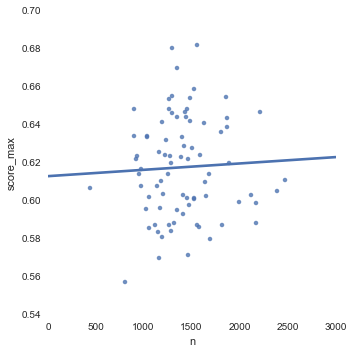

In [365]:
n_score = sns.lmplot('n', 'score_max', mv_summaries, ci=None)
tooltip = mpld3.plugins.PointLabelTooltip(n_score.axes[0][0].collections[0], labels=list(mv_summaries.region_names))
fig = plt.gcf()
mpld3.plugins.connect(fig, tooltip)

In [362]:
?sns.regplot

In [329]:
stats.pearsonr(mv_summaries['score_max'], mv_summaries.score_diff)

(0.65984003290387727, 2.7958135873693792e-11)

In [199]:
mv_20.mean()

region      40.500000
score_20     0.613601
dtype: float64

In [196]:
mv_summaries['score_max'].mean()

0.61769744913773061

In [205]:
tools.make_mask_map(mv_summaries.sort('region')['score_max'], o_clf.mask_img, '../results/coact_kmeans_80_GNB_t0.05_cog_topics_60/mv_max')

In [194]:
mv_summaries[mv_summaries['region_names'] == 'dlPFC']

,region,score_1,region_names,score_max,score_20,score_diff,sdi,n,Hcorr
66,45,0.530393,dlPFC,0.601261,0.591318,0.070868,3.462231,1449,3.463081


(-0.70010223719002707, 4.9470109984779829e-13)

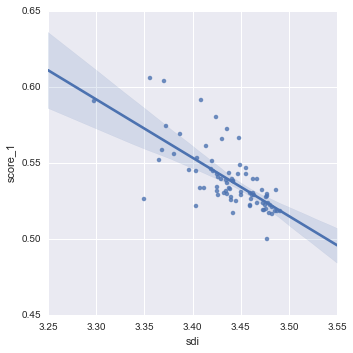

In [155]:
sns.lmplot('sdi', 'score_1', mv_summaries)
stats.pearsonr(mv_summaries.sdi, mv_summaries.score_1)

(-0.80334843172668713, 3.0758657334673004e-19)

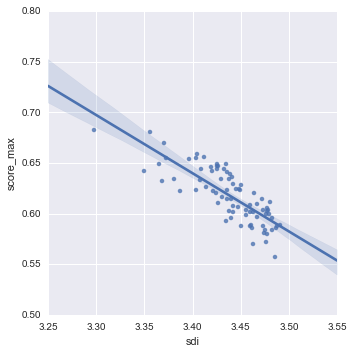

In [156]:
mpld3.enable_notebook()
max_sdi = sns.lmplot('sdi', 'score_max', mv_summaries)
tooltip = mpld3.plugins.PointLabelTooltip(max_sdi.axes[0][0].collections[0], labels=list(mv_summaries.region_names))
fig = plt.gcf()
mpld3.plugins.connect(fig, tooltip)
stats.pearsonr(mv_summaries.sdi, mv_summaries.score_max)

In [160]:
stats.pearsonr(mv_summaries.score_diff, mv_summaries.sdi)

(-0.32781713940446305, 0.0029932443565662266)

(3, 25)

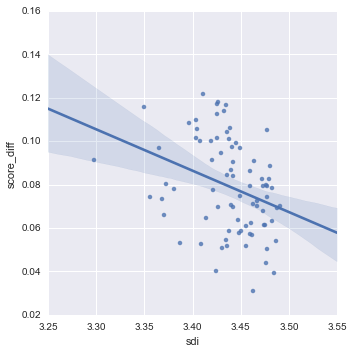

In [95]:
mpld3.enable_notebook()
diff_sdi = sns.lmplot('sdi', 'score_diff', mv_summaries)
tooltip = mpld3.plugins.PointLabelTooltip(diff_sdi.axes[0][0].collections[0], labels=list(mv_summaries.region_names))
fig = plt.gcf()
mpld3.plugins.connect(fig, tooltip)
stats.pearsonr(mv_summaries.sdi, mv_summaries.score_diff)
3, 25, 

In [96]:
## VS and VMPFC = both low SDI, but low and high diff respectively
## pc and inssula, high SDI, low and high diff respct


In [273]:
%%R -w 650 -h 500
ggplot(mv_results_all, aes(num_features, score, group=region, color=region_names, alpha=alphas)) + 
stat_summary(fun.y=mean, geom="line", size=0.5, alpha=0.2) +
stat_summary(fun.y=mean, geom="line", size=1.7, color='black') +
stat_summary(fun.y=mean, geom="line", size=1.5) +
theme_bw() + ylab("Discriminability (roc-auc)" ) + xlab("Number of topics") + 
theme(axis.title.y = element_text(size = 13, vjust = 0.2)) + coord_cartesian(xlim = c(0, 35)) +
scale_color_manual(values= c("#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",'black', "#e31a1c",  "#fdbf6f", "#ff7f00", "#6a3d9a"))+
scale_alpha(range=c(0,1)) +
theme(panel.border = element_blank(), panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
# ggsave('/Users/aleph4/Dropbox/projects/ns_classify/reports/ns_classify_paper/figures/mv_curves_select_comb_80.png')

Error in eval(expr, envir, enclos) : object 'score_log_t20' not found
Saving 9.03 x 6.94 in image
Error: Insufficient values in manual scale. 12 needed but only 10 provided.


In [ ]:
mv_results_all[mv_results_all.groupby('region')['score'].transform(max) == mv_results_all['score']].mean()

In [ ]:
test = mv_results_all[mv_results_all.num_features == 1]
test['diff'] = mv_results_all[mv_results_all.num_features == 1].score.values - mv_results_all[mv_results_all.num_features == 20].score.values

In [247]:
tools.make_mask_map(mv_results_all[mv_results_all.num_features == 1].score, o_clf.mask_img, '../results/coact_kmeans_80_GNB_t0.05_cog_topics_60/mv_max_1_score')
tools.make_mask_map(mv_results_all[mv_results_all.num_features == 25].score, o_clf.mask_img, '../results/coact_kmeans_80_GNB_t0.05_cog_topics_60/mv_max_25_score')

In [252]:
mv_results_all[mv_results_all.num_features == 1].score.min()

0.5

In [ ]:
## Try logging scale on brain and on plot - common scale; NAcc should stay same, DLPFC and Insula should stay similar

In [ ]:
%%R -w 600 -h 500
library(ggplot2)
ggplot(mv_results_all, aes(num_features, score_unit, color=factor(region))) + stat_summary(fun.y=mean, geom="point", size=2) + theme_bw() + ylab("Explained variance" ) + xlab("Number of topics") + 
theme(axis.title.y = element_text(size = 13, vjust = 0.2)) + coord_cartesian(xlim = c(0, 20)) + stat_summary(fun.y=mean, geom="line", size=1)

In [ ]:
stats.pearsonr(mv_results_all.query('num_features <= 20').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit'])), o_fis_melt.groupby('region').mean().base_rate)

In [ ]:
stats.pearsonr(mv_results_all.query('num_features <= 20').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit'])), o_fis_melt.groupby('region').mean().score)

In [ ]:
aucs = mv_results_all.query('num_features <= 20').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit']))

In [ ]:
sns.regplot(o_fis_melt.groupby('region').mean().base_rate, 1 / mv_results_all.query('num_features <= 20').groupby('region').apply(lambda x: auc(x['num_features'], x['score_unit'])))

In [ ]:
sns.regplot(mv_auc, mv_results_all.groupby('region').max().score )